In [149]:
!python -m pip install --upgrade pip


In [150]:
pip install pytrends

In [151]:
pip install matplotlib pandas  seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [152]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [153]:
pytrends =TrendReq(hl ='en=US', tz =360)
keyword = "Artificial intelligence"

In [154]:
pytrends.build_payload([keyword], cat =0, timeframe ='today 12-m',geo='',gprop='')

In [155]:
region_data =pytrends.interest_by_region()
print("Data fetched:\n", region_data.head())
region_data =region_data.sort_values(by =keyword, ascending =False).head(15)
print("Top regions:\n", region_data)

Data fetched:
                 Artificial intelligence
geoName                                
Afghanistan                           0
Albania                               0
Algeria                              22
American Samoa                        0
Andorra                               0
Top regions:
                       Artificial intelligence
geoName                                      
St. Helena                                100
Ethiopia                                   97
China                                      91
Zimbabwe                                   89
Pakistan                                   60
India                                      55
Nigeria                                    54
Ghana                                      50
Philippines                                48
Sri Lanka                                  47
Kenya                                      46
Nepal                                      44
Tanzania                                   42
U

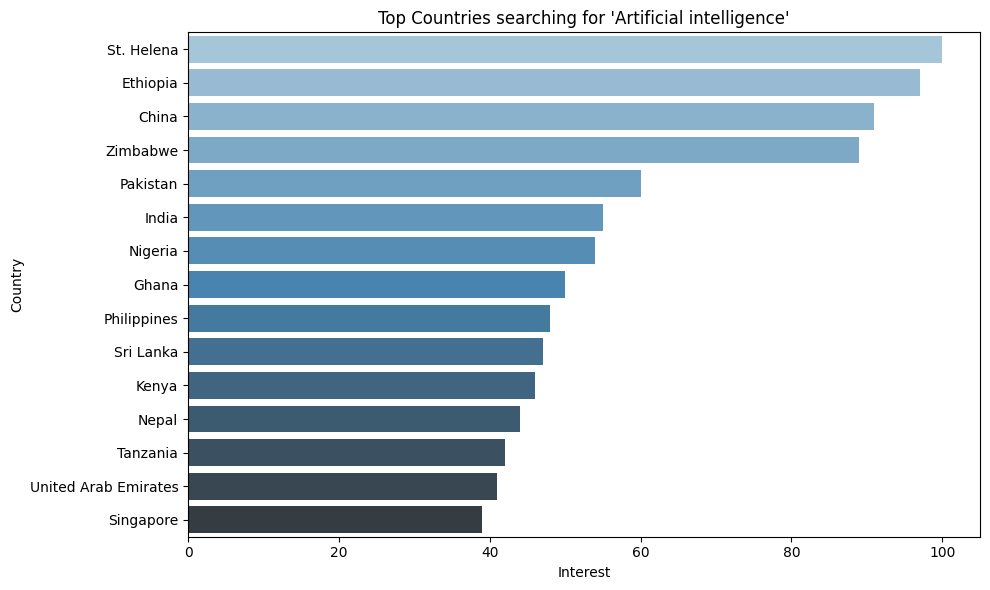

In [156]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index,hue=region_data.index, palette ="Blues_d")

plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [157]:
region_data =region_data.reset_index()
fig =px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color =keyword, 
                    title =f"Search Interest for '{keyword}' by Country",
color_continuous_scale ='greens')
fig.show()

In [158]:
time_df =pytrends.interest_over_time()



C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



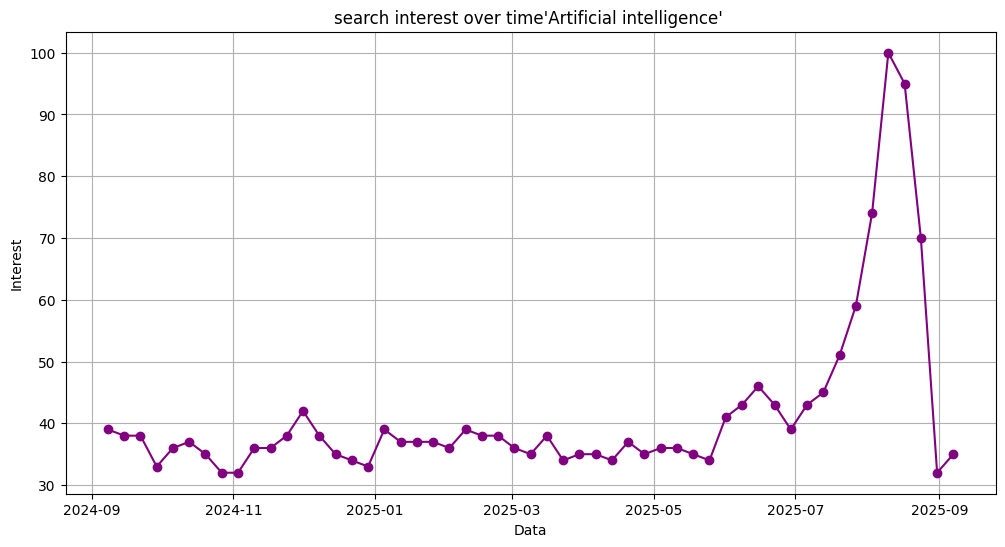

In [159]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword],marker='o', color='purple')
plt.title(f"search interest over time'{keyword}' ")
plt.xlabel("Data")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

In [160]:
s_list=["machine learning", "data science", "computer vision", "electronics","artificial intelligence"]
pytrends.build_payload(s_list, cat=0, timeframe='today 12-m', geo='',gprop='')

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



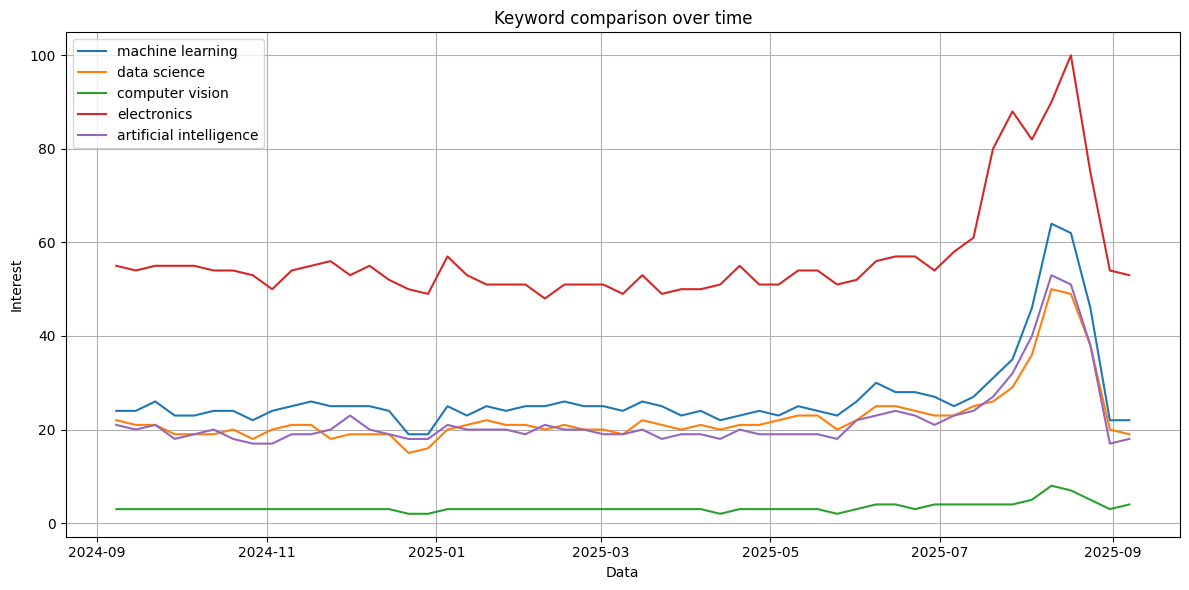

In [161]:
compare_df =pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for s in s_list:
    plt.plot(compare_df.index, compare_df[s], label =s)
plt.title("Keyword comparison over time")
plt.xlabel("Data")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [162]:
pytrends = TrendReq(hl='en-US', tz=360)
keywords = ["electronics", "artificial intelligence", "quantum computing"]
pytrends.build_payload(keywords, timeframe='today 12-m')


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



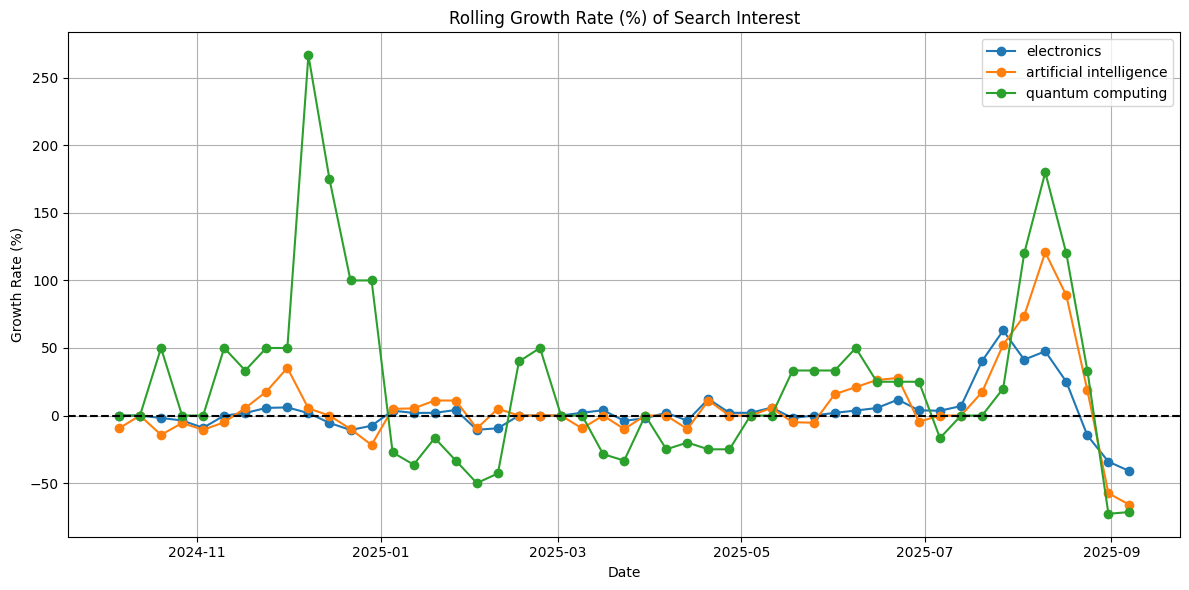

In [163]:

time_df = pytrends.interest_over_time().drop(columns=['isPartial'])
rolling_window = 4  
growth_df = time_df.pct_change(periods=rolling_window) * 100

plt.figure(figsize=(12, 6))
for keyword in keywords:
    plt.plot(growth_df.index, growth_df[keyword], marker='o', label=keyword)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Rolling Growth Rate (%) of Search Interest")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [164]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


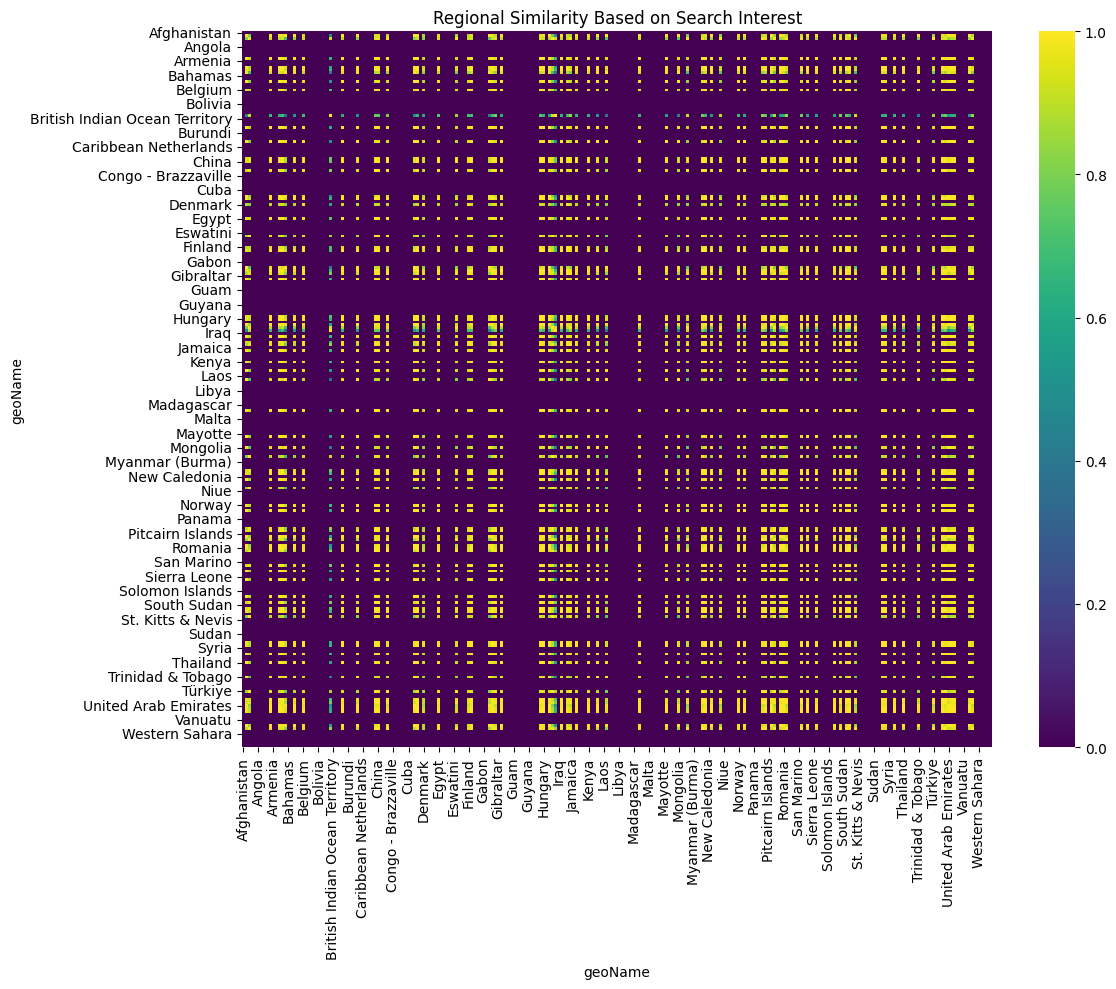

In [165]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Setup
pytrends.build_payload(keywords, timeframe='today 12-m')
region_data = pytrends.interest_by_region().dropna()

# Compute cosine similarity between regions
similarity = cosine_similarity(region_data)

# Convert to DataFrame for better visualization
sim_df = pd.DataFrame(similarity, index=region_data.index, columns=region_data.index)

# Plot heatmap of similarity between regions
plt.figure(figsize=(12, 10))
sns.heatmap(sim_df, cmap='viridis', annot=False)
plt.title("Regional Similarity Based on Search Interest")
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



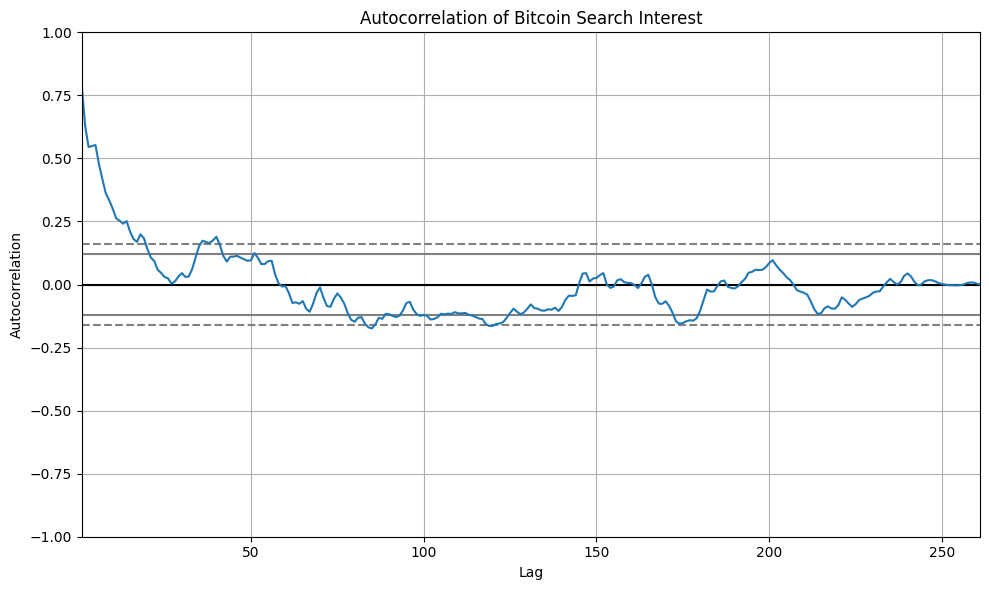

In [166]:
from pandas.plotting import autocorrelation_plot

# Setup
pytrends.build_payload(["bitcoin"], timeframe='today 5-y')
bitcoin_df = pytrends.interest_over_time().drop(columns=['isPartial'])

# Autocorrelation plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(bitcoin_df['bitcoin'])
plt.title("Autocorrelation of Bitcoin Search Interest")
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



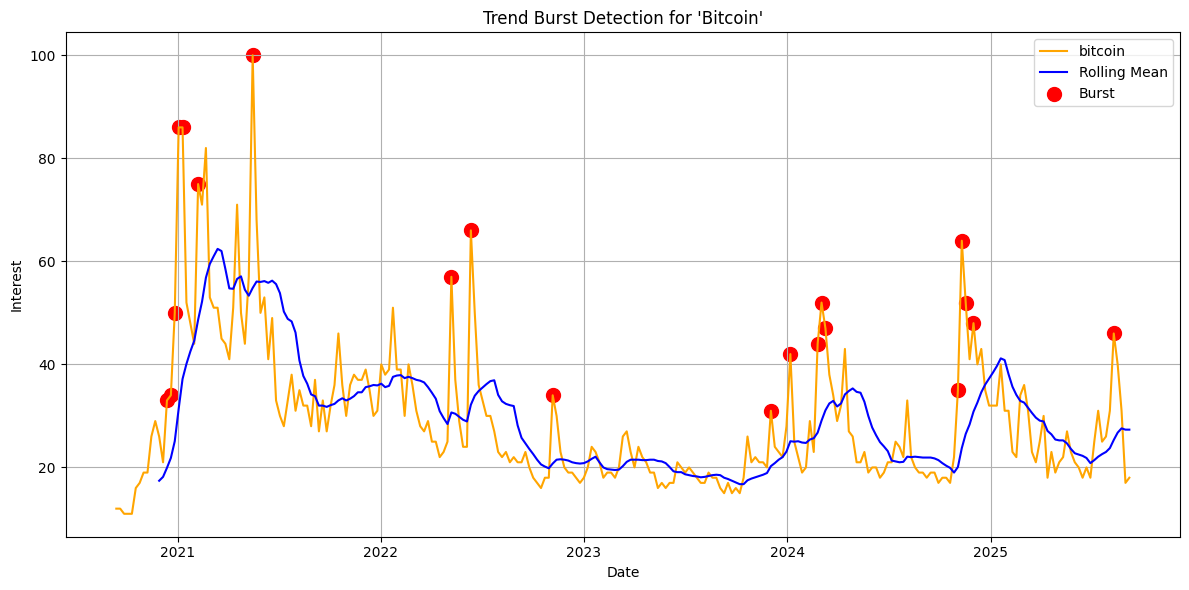

In [168]:

pytrends = TrendReq(hl='en-US', tz=360)
keyword = "bitcoin"
pytrends.build_payload([keyword], timeframe='today 5-y')
time_df = pytrends.interest_over_time().drop(columns=['isPartial'])


rolling_window = 12  
time_df['rolling_mean'] = time_df[keyword].rolling(window=rolling_window).mean()
time_df['burst'] = time_df[keyword] > (time_df['rolling_mean'] * 1.5)
plt.figure(figsize=(12, 6))
plt.plot(time_df.index, time_df[keyword], label=keyword, color='orange')
plt.plot(time_df.index, time_df['rolling_mean'], label='Rolling Mean', color='blue')
plt.scatter(time_df.index[time_df['burst']], time_df[keyword][time_df['burst']], color='red', label='Burst', s=100)
plt.title("Trend Burst Detection for 'Bitcoin'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
